In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import make_column_selector


import xgboost as xgb
from xgboost import XGBClassifier

### GET DATA 

In [3]:
# reading dataset using panda
data_path = os.path.dirname(os.getcwd())
data_df = pd.read_csv(os.path.join(data_path, "data/data_income.csv"))


In [4]:
data_df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
# Define the categorical columns to one-hot encode
categorical_cols = [
    "occupation",
    "education",
    "workclass",
    "marital-status",
    "relationship",
    "race",
    "native-country",
    "gender",
]
numeric_cols = [
    "age",
    "fnlwgt",
    "educational-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
]


In [6]:
# Split into X and y, drop the target variable from X and convert y to binary
y = data_df['income'].map({'<=50K': 0, '>50K': 1})
X = data_df.drop('income', axis=1)

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## XGBoost

In [8]:
le = LabelEncoder()

X_train_le = X_train
X_test_le = X_test

# Apply LabelEncoder to the categorical columns
for col in categorical_cols:
    X_train_le[col] = le.fit_transform(X_train[col])
    X_test_le[col] = le.transform(X_test[col])

In [9]:
X_train_le

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
37193,42,4,145175,15,10,2,7,0,4,1,0,0,40,39
31093,52,6,175029,0,6,2,3,0,4,1,0,0,35,39
33814,34,2,172664,11,9,2,3,0,4,1,0,0,40,39
14500,28,4,125791,11,9,4,1,1,4,0,0,0,40,39
23399,46,4,28419,8,11,4,14,1,4,1,0,0,50,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,36,4,635913,11,9,3,8,1,2,1,0,0,40,39
44732,34,4,107624,15,10,2,3,0,4,1,0,0,50,39
38158,28,4,250135,15,10,0,4,1,4,0,0,0,40,39
860,46,7,96652,8,11,5,1,4,2,0,0,0,40,39


In [10]:
# Create and fit the XGBoost model
model = XGBClassifier(eval_metric="error", random_state=42)
model.fit(X_train_le, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_le)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in

Accuracy: 0.8768


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in

## Permutation importance

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in

Permutation Importances:
capital-gain: 0.0538
educational-num: 0.0275
relationship: 0.0261
age: 0.0177
occupation: 0.0174
capital-loss: 0.0121
hours-per-week: 0.0074
marital-status: 0.0063
workclass: 0.0039
fnlwgt: 0.0028
gender: 0.0028
native-country: 0.0007
education: 0.0006
race: 0.0001


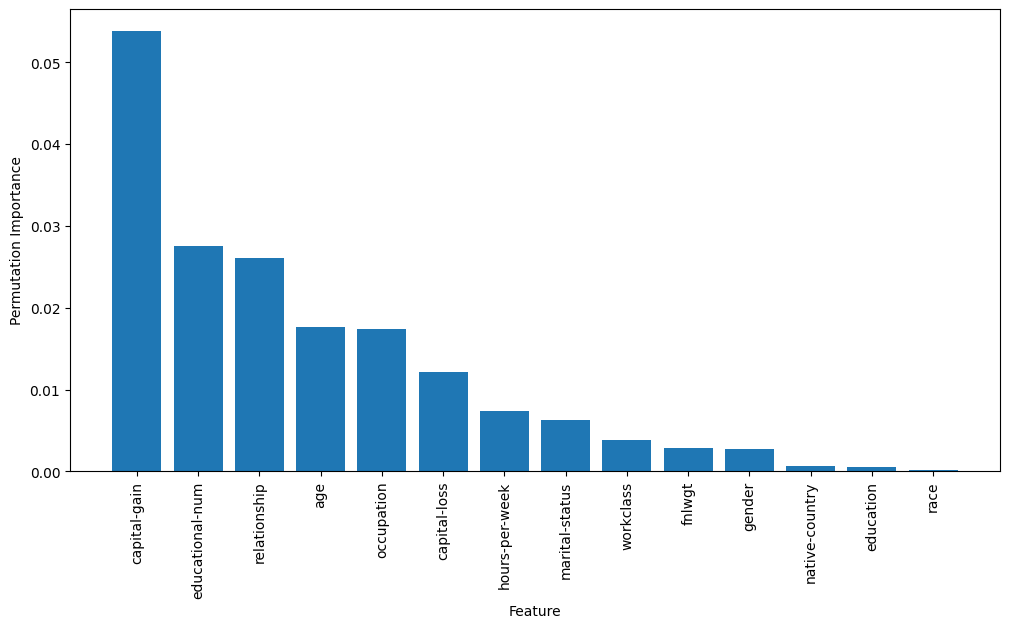

In [11]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Calculate Permutation Importance
perm_importance = permutation_importance(model, X_test_le, y_test, n_repeats=30, random_state=42)

# Get feature names and their importances
feature_names = X.columns
perm_importances = perm_importance.importances_mean

# Sort the features by their importance
sorted_idx = perm_importances.argsort()[::-1]

# Print and plot the feature importances
print("Permutation Importances:")
for i in sorted_idx:
    print(f"{feature_names[i]}: {perm_importances[i]:.4f}")

# Create a bar chart to visualize the feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_idx)), perm_importances[sorted_idx])
# Corrected the 'plt.xticks' call
plt.xticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Permutation Importance")
plt.show()


## XPER

In [12]:
import XPER

In [21]:
from XPER.compute.Performance import ModelPerformance

# Define the evaluation metric(s) to be used
XPER = ModelPerformance(X_train_le, y_train, X_test_le, y_test, model, sample_size=200)


In [22]:
# Evaluate the model performance using the specified metric(s)
PM = XPER.evaluate(["AUC"])

In [23]:
# Print the performance metrics
print("Performance Metrics: ", round(PM, 3))

Performance Metrics:  0.942


In [24]:
# Option 1 - Kernel True
# Calculate XPER values for the model's performance
XPER_values = XPER.calculate_XPER_values(["Accuracy"], N_coalition_sampled=1000)

Performing Computation: 100%|██████████| 1/1 [03:44<00:00, 224.34s/it]


In [25]:
from XPER.viz.Visualisation import visualizationClass as viz

labels = list(data_df.drop(columns='income').columns)

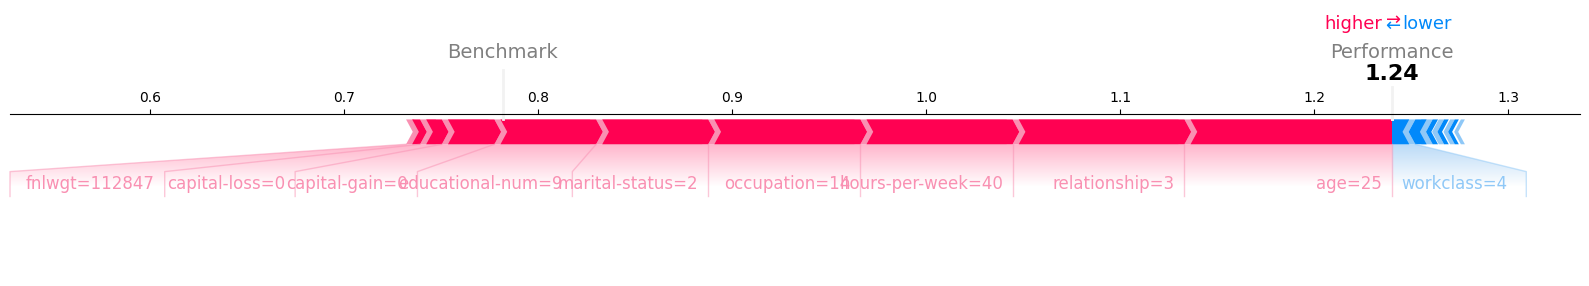

In [26]:
viz.force_plot(XPER_values=XPER_values, instance=1, X_test=X_test_le, variable_name=labels, figsize=(16,4))

In [27]:
viz.bar_plot(XPER_values=XPER_values, X_test=pd.DataFrame(X_test_le), labels=labels, p=6,percentage=True)